In [1]:
# 在tf_keras_classification文件上加入了对数据的标准化处理
# 其中标准化与归一化的区别参考下方链接
# https://blog.csdn.net/u010947534/article/details/86632819
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
# 将训练集拆分为训练集和验证集 共60000张图片，前5000张为验证集，后55000张为训练集
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(np.max(x_train), np.min(x_train))

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
255 0


In [16]:
# x = (x - u)/std  u:均值  std:标准差
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 进行转换：  只能对二位矩阵进行处理，所以要将三维矩阵先转为二维，之后再转换回去
# 又因为原数据为int型，因要做除法，所以先转为float型
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28) 

# scaler.fit_transform与scaler.transform的区别为前者会记录均值与标准差的值
# 当再用scaler.transform的时候就不用计算均值与标准差了
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136
[[-0.8105197  -0.81041294 -0.80991477 -0.8087095  -0.80722463 -0.804824
  -0.80031824 -0.78391546 -0.74510497 -0.6501292  -0.43185088 -0.2890386
  -0.22142817 -0.24414839 -0.24528669 -0.19985735 -0.22351755 -0.34604713
  -0.50718194 -0.68553    -0.7594606  -0.7851756  -0.7947466  -0.799272
  -0.8045405  -0.808279   -0.8099972  -0.8098218 ]
 [-0.81044847 -0.8100461  -0.80880564 -0.8054641  -0.800823   -0.78806305
  -0.7283941  -0.61860305 -0.45749375 -0.21625298  0.09646878  0.30617717
   0.43090475  0.42058995  0.39993778  0.46244204  0.426246    0.22142583
   0.01479813 -0.2920044  -0.51662654 -0.6596392  -0.74077827 -0.7661294
  -0.7836233  -0.7982041  -0.80617    -0.80872375]
 [-0.81010395 -0.80940384 -0.80676305 -0.80052775 -0.7853873  -0.7072674
  -0.5622249  -0.4311879  -0.26781917 -0.01412261  0.2423659   0.31639823
   0.35982957  0.37592366  0.3754278   0.39107445  0.36248493  0.31922758
   0.20283554 -0.07890023 -0.30876687 -0.45369112 -0.5989968  -0.71068

In [12]:
#构建分类训练模型 

# tf.keras.models.Sequential()
# 定义一个顺序模型
model = keras.models.Sequential()

'''  
# 将输入矩阵[28,28]经过第一层后展平为[28*28,1]
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 全连接层Dense,输出为300个节点
# relu: y = max(0, x)
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
# 最后输出10个分类,softmax会将向量变为概率
model.add(keras.layers.Dense(10,activation='softmax'))
'''

# 另一种构建模型的方式，传入一个列表，列表中为各层
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# 损失函数loss:用sparse是因为每个y_train是一个值，而不是一个向量，需要将其转换为[10,1]的向量
# 若y_train本来就是向量的话，损失函数用categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer = 'adam',
             metrics = ["accuracy"])    # 指标metrics  关系模型的精确度accuracy

In [13]:
# 开始训练  返回值为训练过程中的历史数据, 可用于画图分析训练效果
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.5355 - accuracy: 0.8091 - val_loss: 0.4336 - val_accuracy: 0.8436
Epoch 2/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.3888 - accuracy: 0.8599 - val_loss: 0.3723 - val_accuracy: 0.8642
Epoch 3/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3521 - accuracy: 0.8723 - val_loss: 0.3512 - val_accuracy: 0.8756
Epoch 4/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3268 - accuracy: 0.8815 - val_loss: 0.3365 - val_accuracy: 0.8790
Epoch 5/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3086 - accuracy: 0.8878 - val_loss: 0.3230 - val_accuracy: 0.8854
Epoch 6/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.2917 - accuracy: 0.8937 - val_loss: 0.3220 - val_accuracy: 0.8838
Epoch 7/10
55000/55000 [===========================

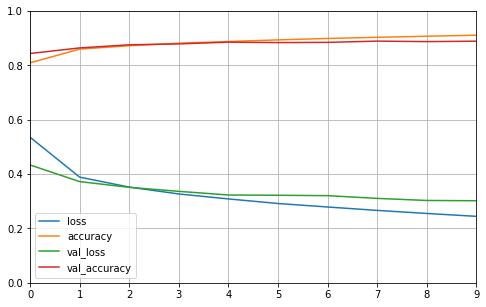

In [14]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
# 当前的图表和子图可以使用plt.gcf()和plt.gca()获得，分别表示"Get Current Figure"和"Get Current Axes"
# 设置y坐标的上下限
    plt.gca().set_ylim(0, 1)  
    plt.show()
    
plot_learning_curves(history)